In [2]:
import pandas as pd
import pickle
import torch  

In [3]:
df = pd.read_csv('dataset/product_data_preprocessed.csv')
df.head()




,cod_modelo_color,des_filename,des_agrup_color_eng_BLUE,des_agrup_color_eng_BROWN,des_agrup_color_eng_GREEN,des_agrup_color_eng_GREY,des_agrup_color_eng_ORANGE,des_agrup_color_eng_PINK,des_agrup_color_eng_PURPLE,des_agrup_color_eng_RED,...,des_product_type_Tie,des_product_type_Top,des_product_type_Totes bag,des_product_type_Trainers,des_product_type_Trenchcoat,des_product_type_Trousers,des_product_type_Turban,des_product_type_Umbrella,des_product_type_Vest,des_product_type_Wallet
0,41085800-02,datathon/images/2019_41085800_02.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,53000586-TO,datathon/images/2019_53000586_TO.jpg,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,53030601-81,datathon/images/2019_53030601_81.jpg,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53050730-15,datathon/images/2019_53050730_15.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,53070773-70,datathon/images/2019_53070773_70.jpg,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# load labels.csv
# load datasets/compatibilities.pickle
with open('dataset/compatibilities.pickle', 'rb') as f:
    compatibilities = pickle.load(f)

# create df frm compatibilities columns cod_modelo_color, community_id from dict items
compatibilities_df = pd.DataFrame.from_dict(compatibilities.items())
compatibilities_df.columns = ['cod_modelo_color', 'community_id']
labels = compatibilities_df
# save as labels.csv
# labels = pd.read_csv('labels.csv')
labels.head()

# merge df and labels
df = pd.merge(df, labels, on='cod_modelo_color')
df.head()

,cod_modelo_color,des_filename,des_agrup_color_eng_BLUE,des_agrup_color_eng_BROWN,des_agrup_color_eng_GREEN,des_agrup_color_eng_GREY,des_agrup_color_eng_ORANGE,des_agrup_color_eng_PINK,des_agrup_color_eng_PURPLE,des_agrup_color_eng_RED,...,des_product_type_Top,des_product_type_Totes bag,des_product_type_Trainers,des_product_type_Trenchcoat,des_product_type_Trousers,des_product_type_Turban,des_product_type_Umbrella,des_product_type_Vest,des_product_type_Wallet,community_id
0,41085800-02,datathon/images/2019_41085800_02.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
1,53000586-TO,datathon/images/2019_53000586_TO.jpg,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
2,53030601-81,datathon/images/2019_53030601_81.jpg,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
3,53050730-15,datathon/images/2019_53050730_15.jpg,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,53070773-70,datathon/images/2019_53070773_70.jpg,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3


In [5]:
# split into X and y
X = df.drop(['community_id'], axis=1)
columns_to_encode = X.columns.difference(["des_filename","cod_modelo_color"])
y = df['community_id']

# create index : cod_modelo_color dict
dict_index_modelo = dict(zip(X.index, X.cod_modelo_color))
# save as dict index_modelo.pickle
with open('dataset/dict_index_modelo.pickle', 'wb') as f:
    pickle.dump(dict_index_modelo, f, pickle.HIGHEST_PROTOCOL)
# create cod_modelo_color : index dict
dict_modelo_index = dict(zip(X.cod_modelo_color, X.index))
# save as dict modelo_index.pickle
with open('dataset/dict_modelo_index.pickle', 'wb') as f:
    pickle.dump(dict_modelo_index, f, pickle.HIGHEST_PROTOCOL)

# save X as X.csv
X.to_csv('dataset/X.csv', index=False)
y.to_csv('dataset/y.csv', index=False)
# save y as y.csv

# Proves

In [6]:
import matplotlib.pyplot as plt
def display_images(paths):
    fig=plt.figure(figsize=(10, 20))
    columns = 4
    rows = 5
    for i in range(1, min(columns*rows +1, len(paths)+1)):
        img = plt.imread(paths[i-1][9:])
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()

def get_image_path(cod_modelo_color, outfit_data):
    return outfit_data[outfit_data['cod_modelo_color'] == cod_modelo_color]['des_filename'].values[0]

datathon/images/2019_41085800_02.jpg


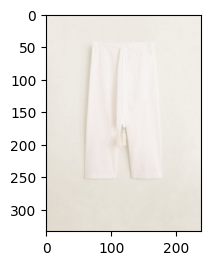

In [8]:
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(2,3))
p = get_image_path(dict_index_modelo[0], df)
print(p)
img = plt.imread(p[9:])
plt.imshow(img)

In [9]:
prod_df = pd.read_csv('dataset/product_data.csv')
prod_df.columns

Index(['cod_modelo_color', 'cod_color_code', 'des_color_specification_esp',
       'des_agrup_color_eng', 'des_sex', 'des_age', 'des_line', 'des_fabric',
       'des_product_category', 'des_product_aggregated_family',
       'des_product_family', 'des_product_type', 'des_filename'],
      dtype='object')

In [10]:
prod_df["des_product_family"].unique()

array(['Trousers', 'Jeans', 'Dresses', 'Shirt', 'Sweater', 'Skirts',
       'Jewellery', 'Bags', 'Glasses', 'Wallets & cases', 'Shorts',
       'Tops', 'Belts and Ties', 'Jumpsuit', 'Jackets', 'Coats',
       'Footwear', 'Hats, scarves and gloves', 'T-shirt', 'Blazers',
       'Gadgets', 'Swimwear', 'Vest', 'Fragances', 'Cardigans',
       'Trenchcoats', 'Puffer coats', 'Outer Vest',
       'Leggings and joggers', 'Deco Accessories', 'Poloshirts',
       'Intimate', 'Sweatshirts', 'Deco Textiles', 'Bedding', 'Bodysuits',
       'Leather jackets', 'Parkas', 'Glassware'], dtype=object)

In [11]:
prod_df["des_product_category"].unique()

array(['Bottoms', 'Dresses, jumpsuits and Complete set', 'Tops',
       'Accesories, Swim and Intimate', 'Outerwear', 'Beauty', 'Home'],
      dtype=object)

In [12]:
# get type Footwear in product_family
prod_df[prod_df["des_product_family"] == "Footwear"]["des_product_category"].unique()

array(['Accesories, Swim and Intimate'], dtype=object)

In [16]:
from restrictions.py import error_function

class Outfit():
    
    def __init__(self, rows=[]):

        for row in rows:
            if row[row["des_product_family"] == "Footwear"]:
                self.footwear = True
            else:
                if row[row["des_product_category"] == "Top"]:
                    self.top = True
                if row[row["des_product_category"] == "Bottom"]:
                    self.bottom = True
                if row[row["des_product_category"] == "Accesories, Swim and Intimate"]:
                    self.accessores = True
                if row[row["des_product_category"] == "Dresses, jumpsuits and Complete set"]:
                    self.Complete_set = True

    def get_error(self):
        actions_list = self.get_actions_list()
        return error_function(actions_list)
    
    def get_actions_list(self):
        actions_list = []
        if self.top:
            actions_list.append("TOP")
        if self.bottom:
            actions_list.append("BOTTOM")
        if self.Complete_set:
            actions_list.append("COMPLETE SET")
        if self.footwear:
            actions_list.append("FOOTWEAR")
        if self.accessores:
            actions_list.append("ACCESSORIES")
        
        return actions_list


ModuleNotFoundError: No module named 'restrictions'